In [17]:
import glob
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

#通过创建data.Dataset子类Mydataset来创建输入
class Mydataset(data.Dataset):
# 类初始化
    def __init__(self, root):
        self.imgs_path = root
# 进行切片
    def __getitem__(self, index):
        img_path = self.imgs_path[index]
        return img_path
# 返回长度
    def __len__(self):
        return len(self.imgs_path)



80
80
{'False': 0, 'True': 1}
{0: 'False', 1: 'True'}
torch.Size([10, 3, 240, 320])


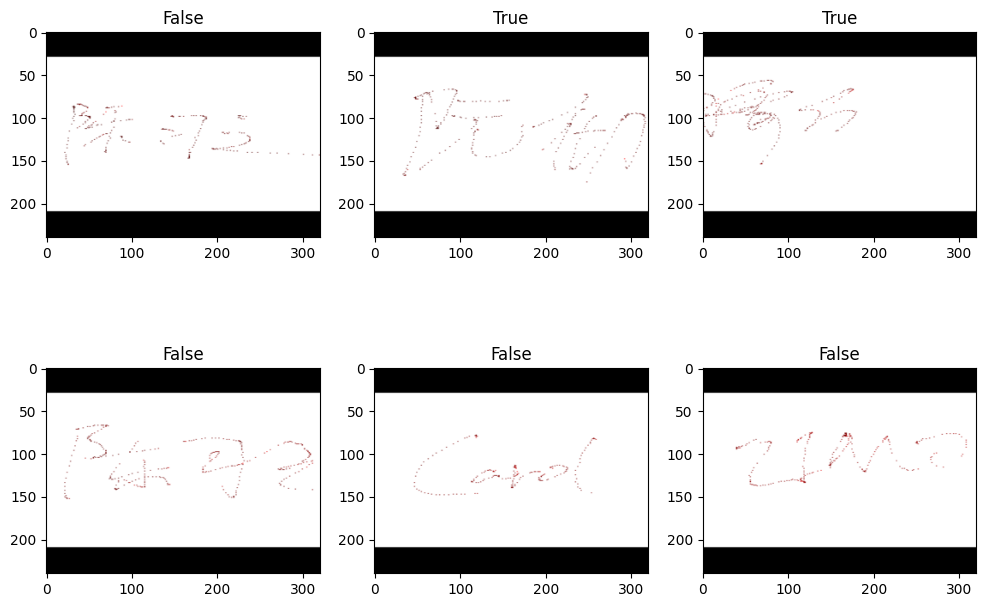

In [18]:
#使用glob方法来获取数据图片的所有路径
all_imgs_path = glob.glob(r'/home/yl7723/work/AML_LAB/img_data/*.png')#数据文件夹路径，根据实际情况更改！
#循环遍历输出列表中的每个元素，显示出每个图片的路径
sample_size=0
for var in all_imgs_path:
    sample_size+=1

print(sample_size)

#利用自定义类Mydataset创建对象weather_dataset
signature_dataset = Mydataset(all_imgs_path)
print(len(signature_dataset)) #返回文件夹中图片总个数
sinature_datalodaer = torch.utils.data.DataLoader(signature_dataset, batch_size=5) #每次迭代时返回五个数据
#print(next(iter(sinature_datalodaer)))

species = ['False','True']
species_to_id = dict((c, i) for i, c in enumerate(species))
print(species_to_id)
id_to_species = dict((v, k) for k, v in species_to_id.items())
print(id_to_species)
all_labels = []
#对所有图片路径进行迭代
for img in all_imgs_path:
    # 区分出每个img，应该属于什么类别
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)
#print(all_labels) #得到所有标签
            

            
# 对数据进行转换处理
transform = transforms.Compose([
                transforms.Resize((240,320)), #做的第一步转换
                transforms.ToTensor() #第二步转换，作用：第一转换成Tensor，第二将图片取值范围转换成0-1之间，第三会将channel置前
])

class Mydatasetpro(data.Dataset):
# 类初始化
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform
# 进行切片
    def __getitem__(self, index):                #根据给出的索引进行切片，并对其进行数据处理转换成Tensor，返回成Tensor
        img = self.imgs[index]
        label = self.labels[index]
        pil_img = Image.open(img)                 #pip install pillow
        data = self.transforms(pil_img)
        return data, label
# 返回长度
    def __len__(self):
        return len(self.imgs)



BATCH_SIZE = 10
signature_dataset = Mydatasetpro(all_imgs_path, all_labels, transform)
sinature_datalodaer = data.DataLoader(
                            signature_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=True
)

imgs_batch, labels_batch = next(iter(sinature_datalodaer))
print(imgs_batch.shape)

plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(id_to_species.get(label.item()))
    plt.imshow(img)
plt.show()#展示图片


In [19]:
import pandas as pd 

#划分测试集和训练集
index = np.random.permutation(len(all_imgs_path))

all_imgs_path = np.array(all_imgs_path)[index]
all_labels = np.array(all_labels)[index]

#80% as train
s = int(len(all_imgs_path)*0.7)
print(s)

train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]





print(test_labels)
train_ds = Mydatasetpro(train_imgs, train_labels, transform) #TrainSet TensorData
test_ds = Mydatasetpro(test_imgs, test_labels, transform) #TestSet TensorData

print(train_ds)
train_imgs = pd.get_dummies(train_imgs)
test_imgs = pd.get_dummies(test_imgs)
#print(train_ds)

train_dl = data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)#TrainSet Labels
test_dl = data.DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=True)#TestSet Labels






56
[1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1]


## 训练

## Resnet

/home/yl7723/miniconda3/envs/test/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yl7723/miniconda3/envs/test/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/15], Loss: 1.0173, Accuracy: 0.4286
Epoch [2/15], Loss: 0.6902, Accuracy: 0.6786
Epoch [3/15], Loss: 0.4409, Accuracy: 0.7857
Epoch [4/15], Loss: 0.2687, Accuracy: 0.8929
Epoch [5/15], Loss: 0.2558, Accuracy: 0.8929
Epoch [6/15], Loss: 0.2051, Accuracy: 0.8929
Epoch [7/15], Loss: 0.2013, Accuracy: 0.8929
Epoch [8/15], Loss: 0.4606, Accuracy: 0.8393
Epoch [9/15], Loss: 0.2024, Accuracy: 0.9107
Epoch [10/15], Loss: 0.2700, Accuracy: 0.8214
Epoch [11/15], Loss: 0.2606, Accuracy: 0.8929
Epoch [12/15], Loss: 0.1814, Accuracy: 0.9464
Epoch [13/15], Loss: 0.0670, Accuracy: 0.9643
Epoch [14/15], Loss: 0.1571, Accuracy: 0.9286
Epoch [15/15], Loss: 0.0881, Accuracy: 0.9643
Validation Accuracy: 96.43%


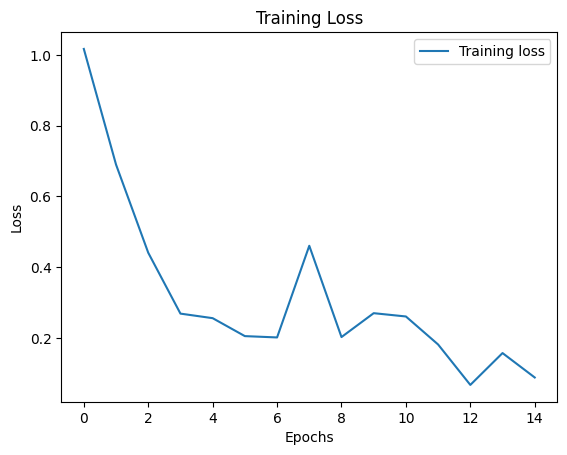

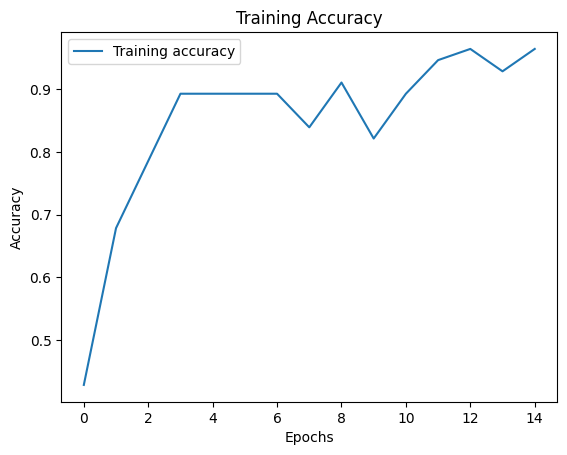

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.utils.data import DataLoader
from torchvision import models
#from torchsummary import summary
# 假设您的数据集已经准备好，包括训练集和验证集
# 这里仅作示例，您需要根据实际情况修改数据加载部分




# 初始化ResNet模型
model_resnet = resnet18(pretrained=True)
num_classes = 2
model_resnet.fc = nn.Linear(model_resnet.fc.in_features, num_classes)




# 设置优化器和损失函数
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 训练模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_resnet.to(device)

# 初始化用于绘图的损失和准确率列表
train_losses = []
train_accuracies = []

# 进行训练
for epoch in range(15):  # 假设训练15个epoch
    model_resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for signatures, labels in train_dl:
        signatures, labels = signatures.to(device), labels.to(device)  # 将数据移动到GPU
        optimizer.zero_grad()  # 梯度清零
        outputs = model_resnet(signatures)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重

        running_loss += loss.item()  # 累加损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dl)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f"Epoch [{epoch+1}/15], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
print(f"Validation Accuracy: {100 * correct / total:.2f}%")

# 绘制损失图
plt.plot(train_losses, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制准确率图
plt.plot(train_accuracies, label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## VGG16

/home/yl7723/miniconda3/envs/test/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/yl7723/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 110MB/s]  


Epoch [1/15], Loss: 2.1803, Accuracy: 0.3750
Epoch [2/15], Loss: 0.8349, Accuracy: 0.4821
Epoch [3/15], Loss: 0.8117, Accuracy: 0.5893
Epoch [4/15], Loss: 0.8794, Accuracy: 0.5357
Epoch [5/15], Loss: 0.7205, Accuracy: 0.5179
Epoch [6/15], Loss: 0.7555, Accuracy: 0.4821
Epoch [7/15], Loss: 0.7052, Accuracy: 0.4643
Epoch [8/15], Loss: 0.7138, Accuracy: 0.5179
Epoch [9/15], Loss: 0.7688, Accuracy: 0.4643
Epoch [10/15], Loss: 0.7199, Accuracy: 0.5536
Epoch [11/15], Loss: 0.6989, Accuracy: 0.5536
Epoch [12/15], Loss: 0.7387, Accuracy: 0.5000
Epoch [13/15], Loss: 0.7014, Accuracy: 0.4821
Epoch [14/15], Loss: 0.7124, Accuracy: 0.5536
Epoch [15/15], Loss: 0.6954, Accuracy: 0.5179
Validation Accuracy: 51.79%


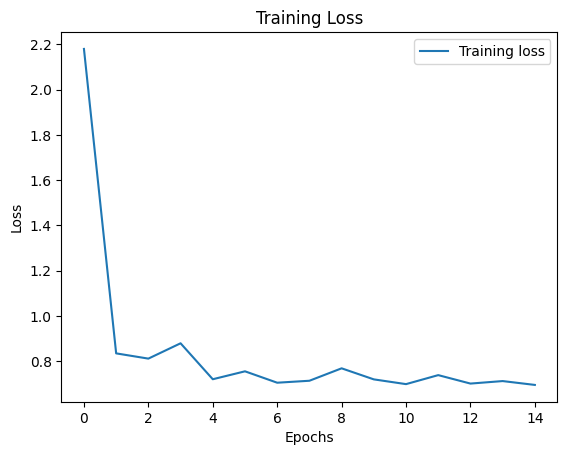

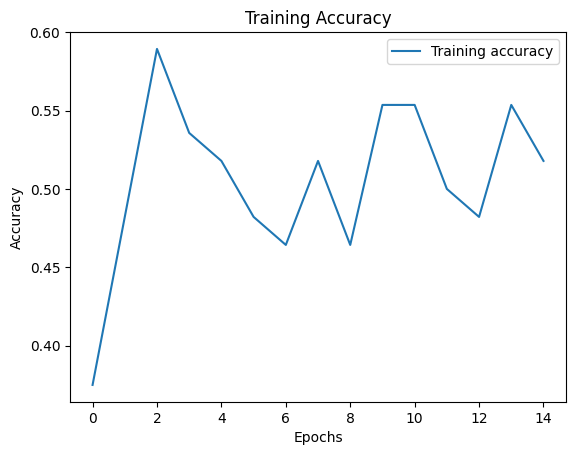

In [21]:
from torchvision.models import vgg16  # 更改这里导入VGG模型

model_vgg = vgg16(pretrained=True)
num_classes = 2
# VGG的分类器是一个Sequential模块，最后一层是一个全连接层
model_vgg.classifier[6] = nn.Linear(model_vgg.classifier[6].in_features, num_classes)  # 修改VGG最后的全连接层

# 设置优化器和损失函数
optimizer = optim.Adam(model_vgg.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 训练模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_vgg.to(device)

# 初始化用于绘图的损失和准确率列表
train_losses = []
train_accuracies = []

# 进行训练
for epoch in range(15):  # 假设训练15个epoch
    model_vgg.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for signatures, labels in train_dl:
        signatures, labels = signatures.to(device), labels.to(device)  # 将数据移动到GPU
        optimizer.zero_grad()  # 梯度清零
        outputs = model_vgg(signatures)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重

        running_loss += loss.item()  # 累加损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dl)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    
    print(f"Epoch [{epoch+1}/15], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
print(f"Validation Accuracy: {100 * correct / total:.2f}%")

# 绘制损失图
plt.plot(train_losses, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制准确率图
plt.plot(train_accuracies, label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from torchvision import models

model_alex = models.alexnet(pretrained=True)
num_classes = 2
# VGG的分类器是一个Sequential模块，最后一层是一个全连接层
model_alex.classifier[6] = nn.Linear(model_alex.classifier[6].in_features, num_classes)  # 修改VGG最后的全连接层

# 设置优化器和损失函数
optimizer = optim.Adam(model_alex.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 训练模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_alex.to(device)

for epoch in range(30):  # 假设训练30个epoch
    model_alex.train()
    running_loss = 0.0
    for images, labels in train_dl:  # 确保train_dl是你的训练数据加载器
        images, labels = images.to(device), labels.to(device)  # 将图像和标签分别移动到设备上
        optimizer.zero_grad()
        outputs = model_alex(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/30], Loss: {running_loss / len(train_dl)}")

# 模型摘要
summary(model_alex, input_size=(3, 256, 256), batch_size=-1, device='cuda')

# 验证模型
model_alex.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_dl:  # 确保test_dl是你的测试数据加载器
        images, labels = images.to(device), labels.to(device)
        outputs = model_alex(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

/home/lyc/anaconda3/envs/mix/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 1.4038848612043593
Epoch [2/30], Loss: 0.7591035895877414
Epoch [3/30], Loss: 0.7420987486839294
Epoch [4/30], Loss: 0.7311559187041389
Epoch [5/30], Loss: 0.7044460442331102
Epoch [6/30], Loss: 0.694562104013231
Epoch [7/30], Loss: 0.6942099200354682
Epoch [8/30], Loss: 0.7040364411142137
Epoch [9/30], Loss: 0.6916324098904928
Epoch [10/30], Loss: 0.6926915844281515
Epoch [11/30], Loss: 0.6957953969637553
Epoch [12/30], Loss: 0.6935693091816373
Epoch [13/30], Loss: 0.6965023875236511
Epoch [14/30], Loss: 0.6944934791988797
Epoch [15/30], Loss: 0.6955071025424533
Epoch [16/30], Loss: 0.6933433810869852
Epoch [17/30], Loss: 0.6964102188746134
Epoch [18/30], Loss: 0.6930805179807875
Epoch [19/30], Loss: 0.698450591829088
Epoch [20/30], Loss: 0.6959928870201111
Epoch [21/30], Loss: 0.6923771036995782
Epoch [22/30], Loss: 0.6975167857276069
Epoch [23/30], Loss: 0.6984588106473287
Epoch [24/30], Loss: 0.6945530308617486
Epoch [25/30], Loss: 0.6987551119592454
Epoch [26/3